<a href="https://colab.research.google.com/github/SachinSharma6174/neural_network/blob/main/Neural_Network_Depth_And_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Enable GPU: "Runtime"-->"Change Runtime"-->"Hardware Accelerator"
#1. Check if GPU is enabled
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [6]:
#2. Importing imdb dataset
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [8]:
#3. Checking image shape
X_train[0].shape

(32, 32, 3)

In [10]:
#4. Data pre-processing

# reshape data to fit the model, -1 will figure out 3rd dimension automatically
X_train = X_train.reshape(X_train.shape[0], 32, 32, -1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, -1)

# changing our target column to one hot encoding

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Inspect what the one-hot encoding looks like for the first value
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
# 5. Create the model with CNN layers
# More information: https://keras.io/api/layers/convolution_layers/convolution2d/

from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

model = Sequential()

# add a conv layer with "same" zero padding
model.add(Conv2D(64, kernel_size = 3, activation = 'relu', padding = "SAME", input_shape = (28, 28, 1)))

# Add a pooling layer
model.add(MaxPooling2D(pool_size= (2,2)))

# Add a second conv layer with a stride of 2x2
model.add(Conv2D(32, kernel_size = 3, activation = "relu", padding = "SAME", strides = (2,2)))

# Add a pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

# Flatten the input
model.add(Flatten())

# Regular FC layer with output size 10 (for the 10 digits)
model.add(Dense(10, activation = "softmax"))

# Print the summary of the model to view the shape and number of parameters
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 32)          18464     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2890      
Total params: 21,994
Trainable params: 21,994
Non-trainable params: 0
__________________________________________________

In [ ]:
# 6. Specify the optimizer
model.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
#7. Time how fast the model train

import time

start = time.time()

# Train using a minibatch stochastic gradient descence
history = model.fit(X_train, y_train, batch_size = 64, epochs = 2, verbose = 1)

end = time.time()

num_mins = (end-start)/60
print("Total training time: "  + str(num_mins) + " minutes.")

Epoch 1/2
938/938 [==============================] - 9s 9ms/step - loss: 0.1360 - accuracy: 0.9574
Epoch 2/2
938/938 [==============================] - 9s 9ms/step - loss: 0.1212 - accuracy: 0.9626
Total training time: 0.3438182274500529minutes.


In [ ]:
#8. Evaluate the model 

score = model.evaluate(X_test, y_test, verbose = 0)
print("Test loss: %.4f" % score[0])
print("Test accuracy: %.2f" % (score[1] * 100.0))

Test loss: 0.1032
Test accuracy: 96.65


In [ ]:
#9. K-fold cross validation
from sklearn.model_selection import KFold
n_folds = 5
scores = []
histories = []

# prepare cross validation
kfold = KFold(n_folds, shuffle = True, random_state = 1)

# enumerate splits
for train_i, test_i in kfold.split(X_train):
    #select the rows for train and test
    trainX, trainY, testX, testY = X_train[train_i], y_train[train_i], X_train[test_i], y_train[test_i]
    #fit model with the new train subset
    history = model.fit(trainX, trainY, epochs = 5, batch_size = 32, validation_data= (testX, testY))
    #evaluate the model with the new test subset
    loss, acc = model.evaluate(testX, testY, verbose =0)
    print("%.2f" % (acc * 100.0))
    scores.append(acc)
    histories.append(history)

    

Epoch 1/5
1500/1500 [==============================] - 15s 10ms/step - loss: 0.1472 - accuracy: 0.9547 - val_loss: 0.1282 - val_accuracy: 0.9615
Epoch 2/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1301 - accuracy: 0.9605 - val_loss: 0.1378 - val_accuracy: 0.9611
Epoch 3/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.1226 - accuracy: 0.9621 - val_loss: 0.1549 - val_accuracy: 0.9542
Epoch 4/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1177 - accuracy: 0.9636 - val_loss: 0.1400 - val_accuracy: 0.9578
Epoch 5/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.1022 - accuracy: 0.9694 - val_loss: 0.2208 - val_accuracy: 0.9367
93.67
Epoch 1/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1068 - accuracy: 0.9673 - val_loss: 0.0978 - val_accuracy: 0.9712
Epoch 2/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1002 - accuracy: 0.9692 - val_loss: 0.1046 - val_ac

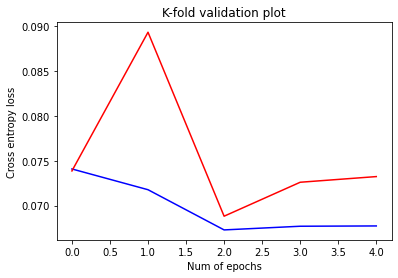

In [ ]:
#10. Plot loss function

from matplotlib import pyplot as plt

plt.plot(histories[4].history["loss"], color = "blue", label = "train")
plt.plot(histories[4].history["val_loss"], color = "red", label = "test")

plt.title("K-fold validation plot")
plt.ylabel("Cross entropy loss")
plt.xlabel("Num of epochs")
plt.show()

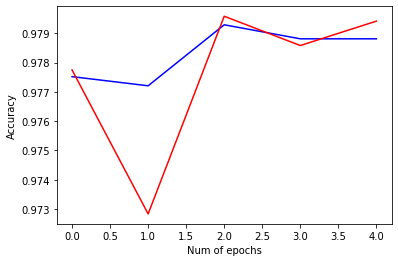

In [ ]:
#11. Plot accuracy
plt.plot(histories[4].history["accuracy"], color = "blue", label = "train")
plt.plot(histories[4].history["val_accuracy"], color = "red", label = "test")

plt.ylabel("Accuracy")
plt.xlabel("Num of epochs")
plt.show()